# College Scorecard Data Analysis Project
## Gentleman Parrot (Group 6)

In this analysis we evaluate the financial implications of attending a four-year post-secondary school in the United States and the degrees to be earned. We analyze the cost and the earnings within an individual’s early career upon exiting a post-secondary institution to try to determine what factors most influence earnings after attending a 4-year university.
 
Our goal was to provide insights to help parents and prospective students understand the cost of college versus the outcomes and returns for their educational investments by visualizing the financial effects of attending college.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [62]:
%matplotlib inline

In [63]:
df_merge3 = pd.read_csv("college-salaries/clean_data.csv")
df_merge3.head()

,Unnamed: 0,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,LATITUDE,LONGITUDE,...,Percent Undergrad Men,Percent Undergrad Women,Title 4 Date,D_PCTPELL_PCTFLOAN,Rank,School Type,Early Career,Mid-Career Pay,% High Meaning,% STEM Degrees
0,0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,...,0.4617,0.5383,1965-12-12 00:00:00,4210.0,1026 (tie),"For Sports Fans, State School",46200,75100,0.59,0.19
1,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.502230,-86.809170,...,0.4116,0.5884,1965-12-01 00:00:00,11679.0,733 (tie),"Research University, For Sports Fans, State Sc...",46000,81800,0.60,0.17
2,2,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,34.722818,-86.638420,...,0.5740,0.4260,1965-12-01 00:00:00,5618.0,240 (tie),"Research University, State School",54200,98500,0.59,0.42
3,3,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,...,0.3850,0.6150,1965-12-01 00:00:00,4805.0,1274 (tie),"For Sports Fans, State School",38300,68500,0.62,0.14
4,4,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,33.214400,-87.545766,...,0.4525,0.5475,1965-12-01 00:00:00,30752.0,407 (tie),"Party School, Research University, For Sports ...",49000,90900,0.51,0.15


## Hypotheses:
We hypothesized the following:
* Universities requiring higher tuition will yield higher earnings post-graduation
* Attending a private school vs public school will affect potential earnings
* The region in which your degree is earned will affect potential earnings

## Data Digging
To complete our analysis we utilized 3 data sets:
* College Scorecard--This data set, supplied by Data.gov, provided comprehensive information regarding the vast 4-year higher education environment in the US, such as tuition, demographic makeup, school type, faculty salaries, median debt, and more.
* Payscale Data--This data set, supplied by Payscale.com, provided information on degrees earned, early career earnings, and mid-career earnings for students graduating from a 4-year post-secondary institution.
* Degrees that Pay Back--This data set, supplied by Wall Street Journal, provided information on baccalaureate degrees and their earning potential

## Tidying Up the Data
Before conducting our analysis, we merged the “College Scorecard” and “Payscale Data” sets and cleaned the merged set as well as the “Degrees that Pay Back” set.
Cleaning involved:
* Re-formatting columns of pre-formatted data (i.e. from currency to float)
* Removing NULL, missing values, “PrivacySupressed”, and universities outside of our parameters (i.e. removing 2-year universities, etc.)
* Ensuring the columns matched on exact names/ids
* Adjusting column names and clearing irrelevant data from columns
* Melting data to convert columns to rows


## Distribution of Median Career Pay
The distribution of median pay for early career pay was shown to follow a normal distribution. 

When looking further into any possible differences in school type, the distribution across school types covers relatively the same spectrum.
The medians for both private and state universities are nearly identical with state universities having a median early career pay value of 46,200USD and private universities touting a median early career pay value of 45,600USD.

Surprisingly, data show that **attending a public vs. private institution has no notable effect on early career earnings**. Due to the positive skew, quartiles will be used to discuss many segments of the data.


Mean early career pay: 
46835.32171581769

Median early career pay: 
45800.0


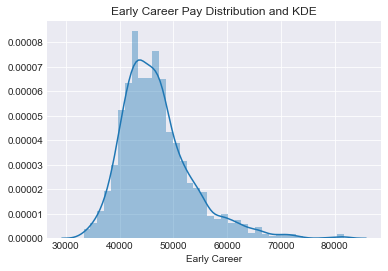

In [65]:
sns.distplot(df_merge3["Early Career"])

print(f"Mean early career pay: ")
print(df_merge3["Early Career"].mean())
print(f"\nMedian early career pay: ")
print(df_merge3["Early Career"].median())

plt.title("Early Career Pay Distribution and KDE")
plt.savefig("dist.png")
plt.show()

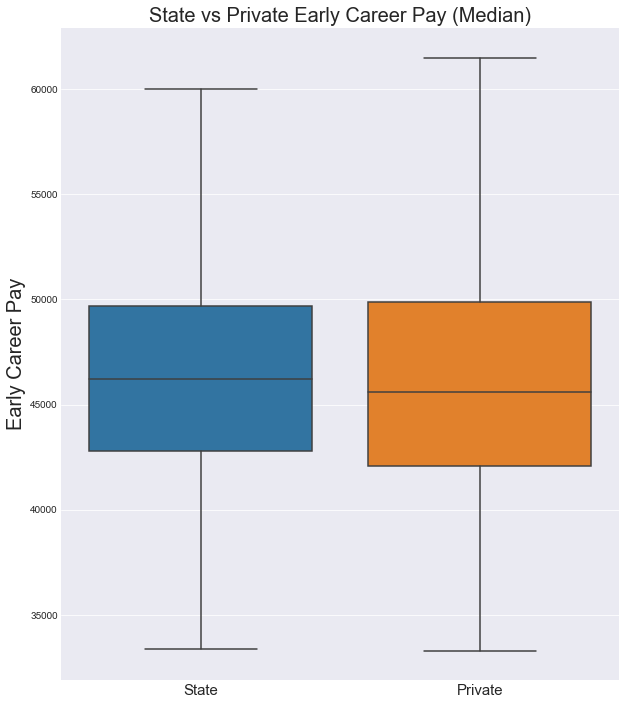

In [66]:
fig = plt.figure(figsize=(10,12))

schoolCat= []

for x in range(len(df_merge3["School Type"])):
    if "Private" in df_merge3["School Type"][x]:
        schoolCat.append("Private")
    elif "State" in df_merge3["School Type"][x]:
        schoolCat.append("State")
    else:
        schoolCat.append("Other")


sns.boxplot(x = schoolCat,y = df_merge3["Early Career"], showfliers = False)

plt.xticks(fontsize = 15)
plt.ylabel("Early Career Pay",fontsize = 20)
plt.title("State vs Private Early Career Pay (Median)", fontsize=20)
plt.savefig("box.png")
plt.show()

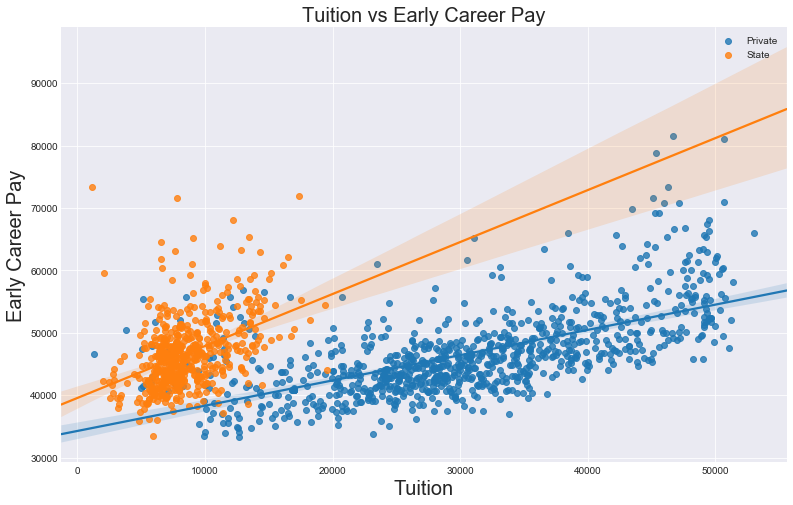

In [67]:
df_merge3["School Category"] = schoolCat

fig = plt.figure(figsize = (13,8))

plot = sns.regplot(x = df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"], label = "Private")
plot = sns.regplot(x = df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"], label = "State")

plt.xlabel("Tuition", fontsize = 20)
plt.ylabel("Early Career Pay", fontsize = 20)

plt.legend()
plt.title("Tuition vs Early Career Pay", fontsize=20)
plt.savefig("regplot.png")
plt.show()

In [68]:
df_merge3 = df_merge3.dropna()

print("\n")
print(stats.linregress(x = df_merge3[df_merge3["School Type"].str.contains("Private")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("Private")]["Early Career"]))
print("\n")
print(stats.linregress(x = df_merge3[df_merge3["School Type"].str.contains("State")]["TUITIONFEE_IN State"], y = df_merge3[df_merge3["School Type"].str.contains("State")]["Early Career"]))



LinregressResult(slope=0.45009483486763685, intercept=32569.462133631507, rvalue=0.6389105973156414, pvalue=2.3269115744038015e-90, stderr=0.019466957888892827)


LinregressResult(slope=0.829426501485647, intercept=39745.02504727941, rvalue=0.388895125922407, pvalue=2.158488395039148e-19, stderr=0.08831519023981586)


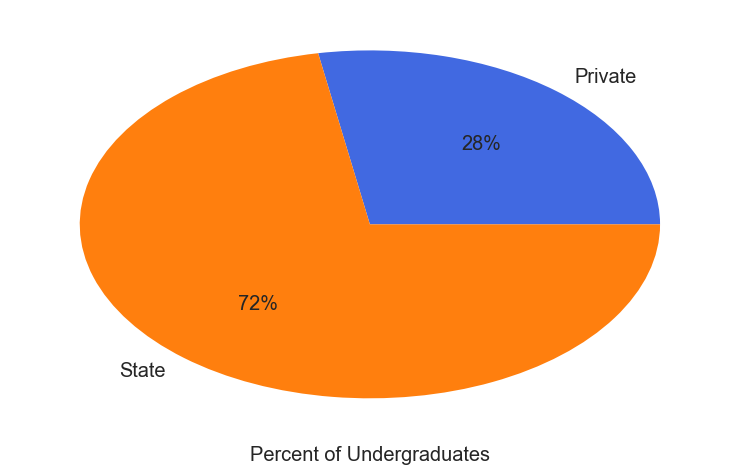

In [69]:
fig = plt.figure(figsize=(13,8))

df_merge3.groupby("School Category")["UGDS"].sum().plot(kind = "PIE", colors = ["royalblue","#ff7f0e"], textprops={'fontsize': 20}, autopct='%1.0f%%')

plt.ylabel("", fontsize = 20)
plt.xlabel("Percent of Undergraduates",fontsize = 20)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation = 360, fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=12)

plt.savefig("pie.png")

plt.show()

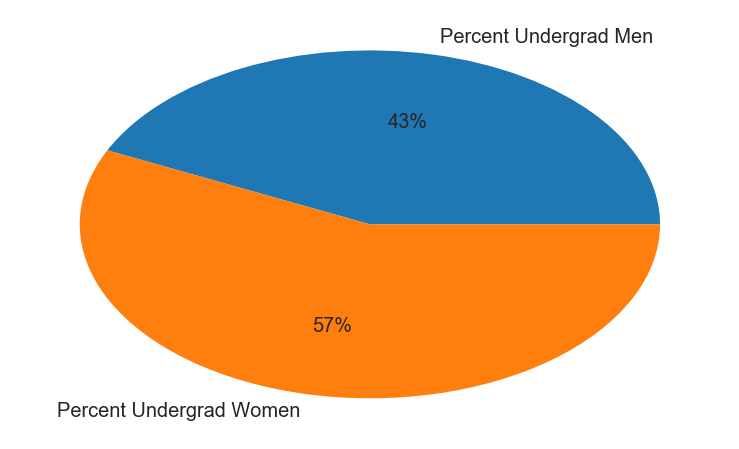

In [70]:
fig = plt.figure(figsize=(13,8))

df_demo = pd.melt(df_merge3,["School Category"],df_merge3.iloc[:,84:86])

df_demo.groupby(["variable"])["value"].sum().plot(kind = "pie", autopct='%1.0f%%', textprops={'fontsize': 20})

plt.ylabel("", fontsize = 20)

plt.savefig("pie2.png")

plt.show()

In [71]:
df_merge3["Bin"] = pd.qcut(df_merge3["Early Career"], 4, labels = ["low","mid-low","mid-high","high"])

In [72]:
df_merge3.loc[:,["Early Career","Bin"]].head()

,Early Career,Bin
0,46200,mid-low
1,46000,mid-low
2,54200,high
3,38300,low
4,49000,mid-high


In [73]:
df_cip = pd.melt(df_merge3,"Bin",df_merge3.iloc[:,24:61])

In [74]:
df_cip2 = df_cip.groupby(["Bin","variable"]).mean().sort_values("value", ascending = False).reset_index()

df_cip2.head()

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.190293
1,mid-low,"Business, Management, and Marketing",0.186864
2,mid-high,"Business, Management, and Marketing",0.180031
3,high,"Business, Management, and Marketing",0.154430
4,mid-low,Health Professions,0.136607


In [75]:
df_cip2[df_cip2["Bin"] == "low"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
0,low,"Business, Management, and Marketing",0.190293
6,low,Health Professions,0.112460
9,low,Education,0.091138
16,low,Psychology,0.069881
22,low,Visual/Performing Arts,0.056212
24,low,Biological and Biomedical Studies,0.049652
28,low,"Homeland Security, Law Enforcement and Firefig...",0.047221
29,low,"Liberal Arts and Sciences, General Studies and...",0.046238
31,low,"Parks, Recreation, Leisure, and Fitness Studies",0.041018
35,low,Communication and Journalism,0.036866


In [76]:
df_cip2[df_cip2["Bin"] == "high"].sort_values("value", ascending = False).head(10)

,Bin,variable,value
3,high,"Business, Management, and Marketing",0.154430
7,high,Engineering,0.111437
8,high,Social Sciences,0.108487
10,high,Health Professions,0.089888
11,high,Biological and Biomedical Studies,0.076314
21,high,Psychology,0.058181
26,high,Visual/Performing Arts,0.048135
32,high,Communication and Journalism,0.039460
38,high,Computer and Information Sciences and Support ...,0.032179
43,high,English Language and Literature/Letters,0.028540


## Discovering Degrees
When looking at the most lucrative degrees to be earned, we compared the data provided by the Wall Street Journal(WSJ) identifying the top 10 highest paying bachelor's degrees on average to the top 10 most often earned degrees for universities (private and state) included in the top 25% of university (according to highest career pay).

According to the WSJ, the majority of the most lucrative degrees are types of engineering degrees. These degrees were much further specified than the degree types provided in the College Scorecard dataset, however, these degrees can be categorized into more overarching fields of engineering, healthcare, and IT. Each of these fields was represented at least within the top degrees being sought within the top quartile of universities as well.

This may imply that students attending these universities are most likely to pursue higher paying degrees that are have a strong program within their university, or that these schools subsequently fall within the top quartile based on earnings due to the fact that the students attending tend to pursue more lucrative degrees.

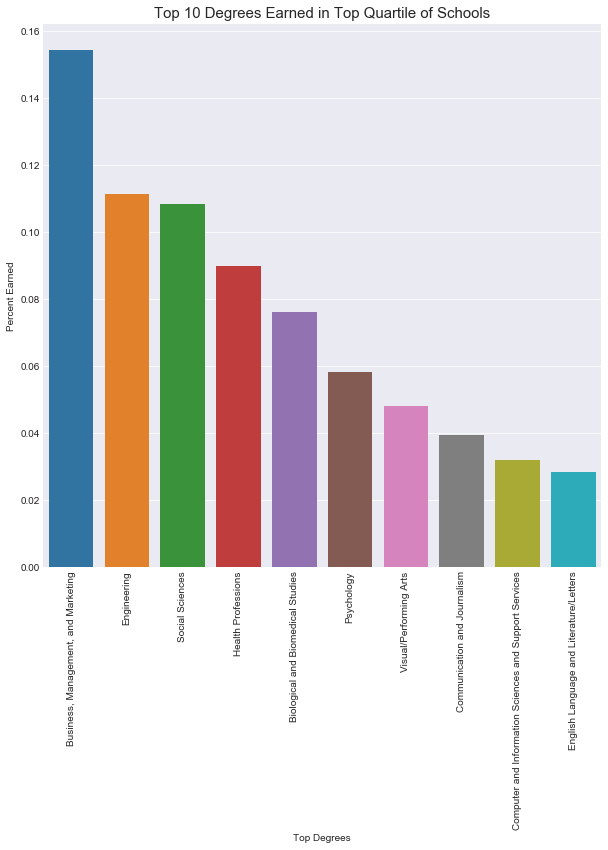

<Figure size 432x288 with 0 Axes>

In [77]:
fig_pie1=plt.figure(figsize=(10,10))
hi_values=df_cip2[df_cip2["Bin"] == "high"]["value"].head(10)
hi_labels=df_cip2[df_cip2["Bin"] == "high"]["variable"].head(10)
hi_data=pd.DataFrame({"Percent Earned":hi_values, "Top Degrees":hi_labels})
# plt.pie(df_cip2[df_cip2["Bin"] == "high"]["value"].head(10),labels = df_cip2[df_cip2["Bin"] == "high"]["variable"].head(10))

sns.set_style("darkgrid")
sns.barplot(x="Top Degrees", y="Percent Earned", data=hi_data)
plt.xticks(rotation="vertical" )
plt.title("Top 10 Degrees Earned in Top Quartile of Schools", fontsize=15)
plt.savefig("Top_Degrees_for_Top_Schools.png")
plt.show()

plt.tight_layout()

In [78]:
degreespay = "college-salaries/degrees-that-pay-back.csv"
df = pd.read_csv(degreespay)
df=df[["Undergraduate Major", "Starting Median Salary"]]
df["Starting Median Salary"]=df["Starting Median Salary"].str.replace("$", "")
df["Starting Median Salary"]=df["Starting Median Salary"].str.replace(",","")
df["Starting Median Salary"]=df["Starting Median Salary"].astype(float)
df.head()

,Undergraduate Major,Starting Median Salary
0,Accounting,46000.0
1,Aerospace Engineering,57700.0
2,Agriculture,42600.0
3,Anthropology,36800.0
4,Architecture,41600.0


In [79]:
df_new=df.sort_values('Starting Median Salary', ascending=False).head(10)
df_new

,Undergraduate Major,Starting Median Salary
43,Physician Assistant,74300.0
8,Chemical Engineering,63200.0
12,Computer Engineering,61400.0
19,Electrical Engineering,60900.0
38,Mechanical Engineering,57900.0
1,Aerospace Engineering,57700.0
30,Industrial Engineering,57700.0
13,Computer Science,55900.0
40,Nursing,54200.0
10,Civil Engineering,53900.0


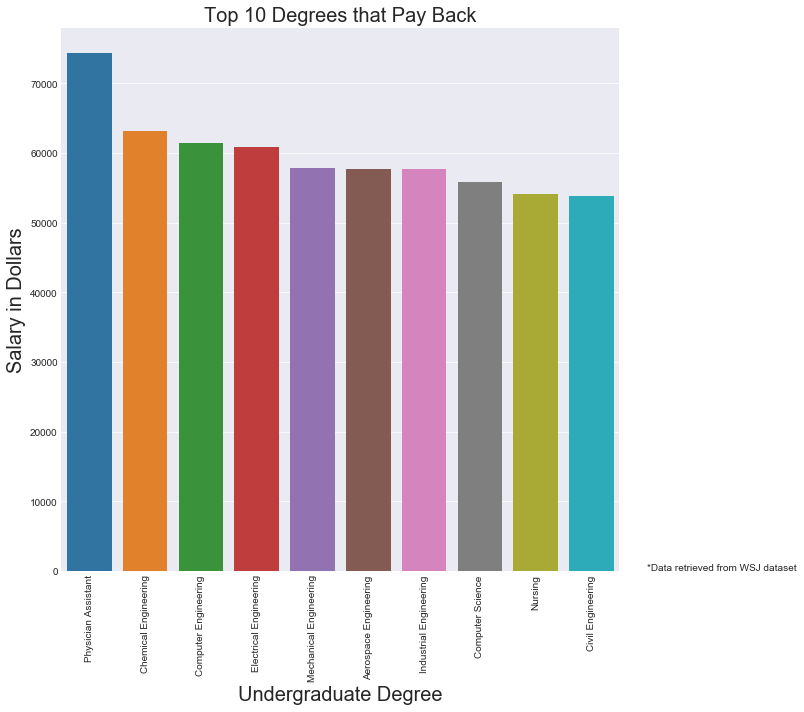

In [82]:
fig=plt.figure(figsize=(10,10))

sns.barplot(x = 'Undergraduate Major', y='Starting Median Salary', data=df_new)
plt.xlabel("Undergraduate Degree", fontsize = 20)
plt.title("Top 10 Degrees that Pay Back", fontsize = 20)
plt.ylabel("Salary in Dollars", fontsize = 20)
plt.xticks(rotation="vertical")
plt.text(10, 100, "*Data retrieved from WSJ dataset")


plt.savefig("Top10.png")
plt.show()

## Earnings by Region
When trying to determine best regions of the US to earn a degree, we discovered the following:
* Earning your degree in the southeastern part of the US will yield a higher debt-to-income ratio. This may be due to the lower earning potential in this region of the country. Conversely, earning your degree on the west coast yields a lower debt-to-income ratio.
* The most affordable state to earn a degree, based on in-state tuition alone, is Wyoming.

Region does appear to affect the "bang for your buck" when earning a 4-year degree. Despite the western US being the most expensive area of the country to earn a degree (based on in-state tuition alone), students see a much larger return on investment as this region of the country also supports the highest early career pay.

In [81]:
import plotly.plotly as py


In [57]:
avg_tuition_state=df_merge3.groupby(['STABBR'])['Paid Tuition per Full time student'].mean()
df = pd.DataFrame({'state':avg_tuition_state.index, 'tuition':avg_tuition_state.values})

scl = [[0.0, 'rgb(26,152,80)'],[0.2, 'rgb(145,207,96)'],[0.4, 'rgb(217,239,139)'],\
           [0.6, 'rgb(254,224,139)'],[0.8, 'rgb(252,141,89)'],[1.0, 'rgb(215,48,39)']]

data = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df['state'],
        z = df['tuition'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "Tuition")
         )]

layout = dict(
          title = 'Average Tuition by State',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [58]:
#Avg DTI (Debt to Income) % by state
df_merge=pd.DataFrame(df_merge3[df_merge3["Graduate Median Debt"]!='PrivacySuppressed'])
df_merge["Graduate Median Debt"]=df_merge["Graduate Median Debt"].astype(float)
grad_avg_debt = df_merge.groupby(['STABBR'])['Graduate Median Debt'].mean()
avg_early_pay = df_merge.groupby(['STABBR'])['Early Career'].mean()
DTI = grad_avg_debt/avg_early_pay*100
df2 = pd.DataFrame({'state':grad_avg_debt.index, 'Avg Median Debt by State':grad_avg_debt.values, 'Avg Early Pay by State':avg_early_pay.values, 'DTI':DTI.values})

data2 = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df2['state'],
        z = df2['DTI'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "DTI %")
         )]

layout2 = dict(
          title = 'DTI % Average by State',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig2 = dict(data=data2, layout=layout2)
py.iplot(fig2)

In [59]:
#Avg early career pay by state
early_career_state=df_merge.groupby(['STABBR'])['Early Career'].mean()
df3 = pd.DataFrame({'state':early_career_state.index, 'Avg Early Career Pay':early_career_state.values})
data3 = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df2['state'],
        z = df3['Avg Early Career Pay'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "Early Career Pay ($)")
         )]

layout3 = dict(
          title = 'Avereage Early Career Pay by State',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig3 = dict(data=data3, layout=layout3)
py.iplot(fig3)

In [60]:
#locations of where higher earning degrees are
healthcare_state=df_merge.groupby(['STABBR'])['Health Professions'].sum()
engineering_state=df_merge.groupby(['STABBR'])['Engineering'].sum()
engineeringtech_state=df_merge.groupby(['STABBR'])['Engineering Technologies and Engineering-Related Fields'].sum()
compsci_state=df_merge.groupby(['STABBR'])['Computer and Information Sciences and Support Services'].sum()
total_high_degrees = healthcare_state + engineering_state + engineeringtech_state + compsci_state
df5 = pd.DataFrame({'state':healthcare_state.index, '% avg healthcare degrees':healthcare_state.values, '% avg engineering degrees':engineering_state.values, '% avg engineering tech degrees':engineeringtech_state.values, '%avg comp sci degrees':compsci_state.values, 'total':total_high_degrees.values})

data5 = [dict(
        type='choropleth', 
        colorscale = scl,
        autocolorscale = False,
        locations = df5['state'],
        z = df5['total'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict(
                color = 'rgb(255,255,255)',
                width = 2
            )),
         colorbar = dict(
             title = "Avg % by State of <br>Degrees Received")
         )]

layout5 = dict(
          title = 'Where the Highest Earning Degrees are being Received <br>(Healthcare, Engineering, Computer Science)',
          geo = dict(
              scope='usa',
              projection=dict(type='albers usa'),
              showlakes = True,
              lakecolor = 'rgb(255,255,255)'),
             )
fig5 = dict(data=data5, layout=layout5)
py.iplot(fig5)


## Unexpected Insights and Obstacles
One obstacle encountered was the initial inclusion of multiple other data sets. We ultimately did not find them useful as they did not easily merge with the other, more useful and comprehensive data set and a more comprehensive data set was located.

An unexpected insight was the relation between tuition and early career earnings specifically as it pertains to the difference between students that attend private schools and those who attend public schools.

## Limitations
* Only Title IV schools were included in the College Scorecard data set. A Title IV school is an institution that processes U.S. federal student aid, such as Stafford loans, thus any universities that do not accept student aid were not available for comparison or analysis.
* Some schools (specifically private schools) did not supply all data due to privacy reasons and were therefore omitted from the final analysis.
* Only median scores for early career pay and debt figures were included. Therefore the difference between the mean and median is not known and thus the presence/prevalence of outliers (left or right) is unknown.

## Post Mortem-Looking Forward
Additional interests that may be explored with this data:
* Gender makeup in private vs public
* Faculty to student ratio in top schools vs bottom schools
* Percentage of tuition used for faculty salaries in top schools vs bottom schools
* Acceptance rate of top quartile of universities based on potential earnings
* Average SAT scores for top quartile of universities based on potential earnings

